In [141]:
!pip install pyod
from pyod.utils.data import generate_data_clusters
from sklearn.datasets import make_blobs
from scipy.io import loadmat
from pyod.utils.utility import standardizer
import numpy as np

In [142]:
from mpl_toolkits.mplot3d import Axes3D

In [143]:
def leverage_scores(X):
    X_design = np.column_stack((np.ones(X.shape[0]), X))
    H = X_design @ np.linalg.inv(X_design.T @ X_design) @ X_design.T
    return np.diag(H)

In [144]:
def gen_1d_groups(a=2, b=3, n=25):

    x_reg = np.random.uniform(0, 2, n)
    y_reg = a * x_reg + b + np.random.normal(0, 0.1, n)

    x_hx = np.random.uniform(-10, 30, n)
    y_hx = a * x_hx + b + np.random.normal(0, 0.1, n)

    x_hy = np.random.uniform(0, 2, n)
    y_hy = a * x_hy + b + np.random.normal(0, 5, n)

    x_hb = np.random.uniform(-10, 30, n)
    y_hb = a * x_hb + b + np.random.normal(0, 5, n)

    datasets = [
        ("Regular", x_reg, y_reg),
        ("High var x", x_hx, y_hx),
        ("High var y", x_hy, y_hy),
        ("High var both", x_hb, y_hb),
    ]
    return datasets


In [145]:
def plot_leverage_1d_groups(datasets):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.ravel()

    for i, (label, x, y) in enumerate(datasets):
        h = leverage_scores(x.reshape(-1, 1))
        top_idx = np.argsort(h)[-5:]

        sc = axes[i].scatter(x, y, c=h)
        axes[i].scatter(x[top_idx], y[top_idx], color='red')
        axes[i].set_title(f"{label}")
        axes[i].set_xlabel("x")
        axes[i].set_ylabel("y")
    plt.show()


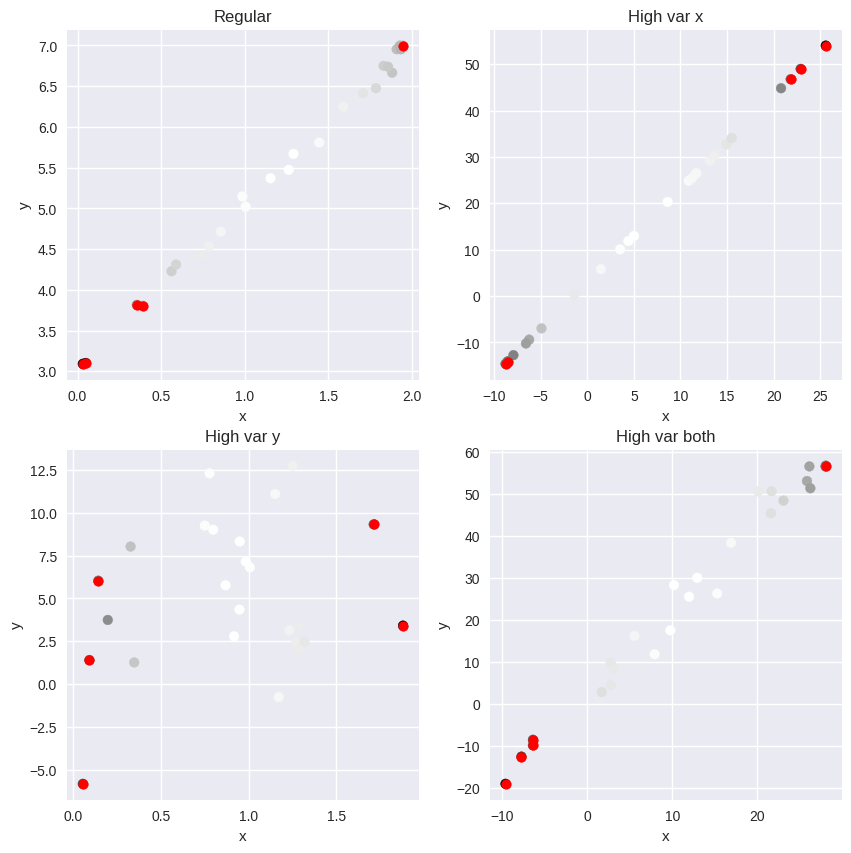

In [146]:
datasets_1d = gen_1d_groups()
plot_leverage_1d_groups(datasets_1d)


In [147]:
def gen_2d_groups(a=2, b=3, c=1, n=25):
    np.random.seed(42)

    x1_reg, x2_reg = np.random.uniform(0, 2, n), np.random.uniform(0, 2, n)
    y_reg = a*x1_reg + b*x2_reg + c + np.random.normal(0, 0.1, n)

    x1_hx, x2_hx = np.random.uniform(-5, 25, n), np.random.uniform(-5, 25, n)
    y_hx = a*x1_hx + b*x2_hx + c + np.random.normal(0, 0.1, n)

    x1_hy, x2_hy = np.random.uniform(0, 2, n), np.random.uniform(0, 2, n)
    y_hy = a*x1_hy + b*x2_hy + c + np.random.normal(0, 5, n)

    x1_hb, x2_hb = np.random.uniform(-5, 25, n), np.random.uniform(-5, 25, n)
    y_hb = a*x1_hb + b*x2_hb + c + np.random.normal(0, 5, n)

    datasets = [
        ("Regular", np.column_stack((x1_reg, x2_reg)), y_reg),
        ("High var x", np.column_stack((x1_hx, x2_hx)), y_hx),
        ("High var y", np.column_stack((x1_hy, x2_hy)), y_hy),
        ("High var both", np.column_stack((x1_hb, x2_hb)), y_hb),
    ]
    return datasets


In [148]:
def plot_leverage_2d_groups_3d(datasets):
    fig = plt.figure(figsize=(10, 10))
    for i, (label, X, y) in enumerate(datasets):
        ax = fig.add_subplot(2, 2, i+1, projection='3d')

        h = leverage_scores(X)
        top_idx = np.argsort(h)[-5:]

        sc = ax.scatter(X[:, 0], X[:, 1], y, c=h)

        ax.scatter(X[top_idx, 0], X[top_idx, 1], y[top_idx], color='red')

        ax.set_title(label)
        ax.set_xlabel("x1")
        ax.set_ylabel("x2")
        ax.set_zlabel("y")
    plt.show()

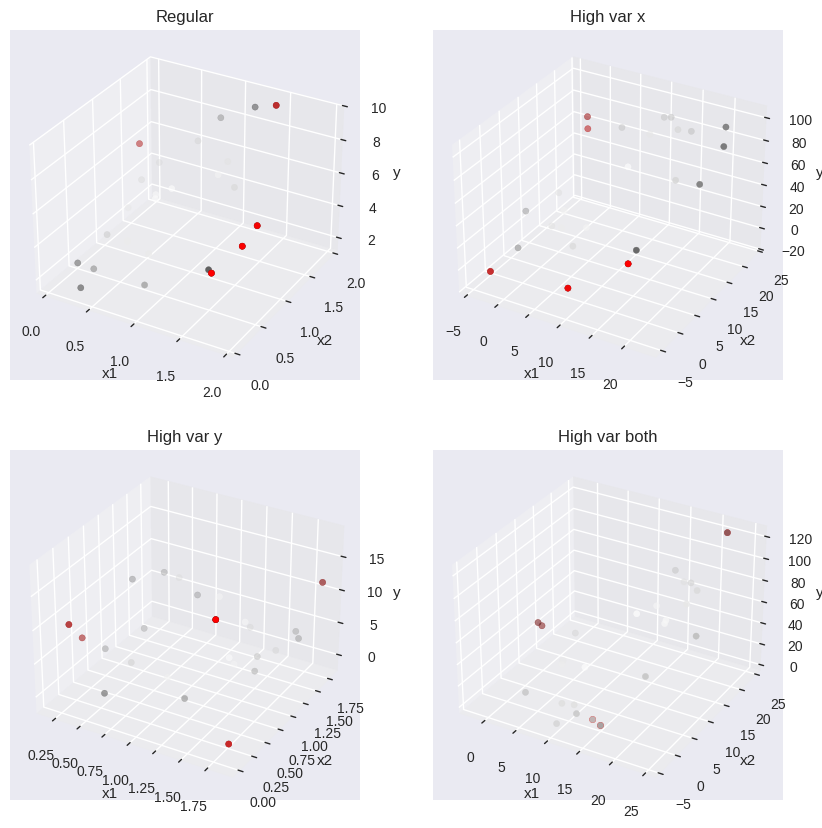

In [149]:
datasets_2d = gen_2d_groups()
plot_leverage_2d_groups_3d(datasets_2d)


In [150]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
from sklearn.metrics import balanced_accuracy_score

In [151]:
X_train, X_test, y_train, y_test = generate_data_clusters(
    n_train=400,
    n_test=200,
    n_features=2,
    n_clusters=2,
    contamination=0.1,
    random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (400, 2), Test shape: (200, 2)


In [152]:
def plot_knn_results(X_train, y_train, X_test, y_test, n_neighbors=5):
    clf = KNN(n_neighbors=n_neighbors)
    clf.fit(X_train)

    y_train_pred = clf.labels_
    y_test_pred = clf.predict(X_test)

    acc = balanced_accuracy_score(y_test, y_test_pred)
    print(f"n_neighbors={n_neighbors}, Balanced Accuracy: {acc:.3f}")

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    titles = [
        "Train - Ground Truth",
        "Train - Predicted",
        "Test - Ground Truth",
        "Test - Predicted"
    ]
    data = [
        (X_train, y_train),
        (X_train, y_train_pred),
        (X_test, y_test),
        (X_test, y_test_pred)
    ]

    for ax, (X, y), title in zip(axes.ravel(), data, titles):
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, alpha=0.8)
        ax.set_title(f"{title} (k={n_neighbors})", fontsize=12)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
    plt.tight_layout()
    plt.show()


n_neighbors=1, Balanced Accuracy: 0.904


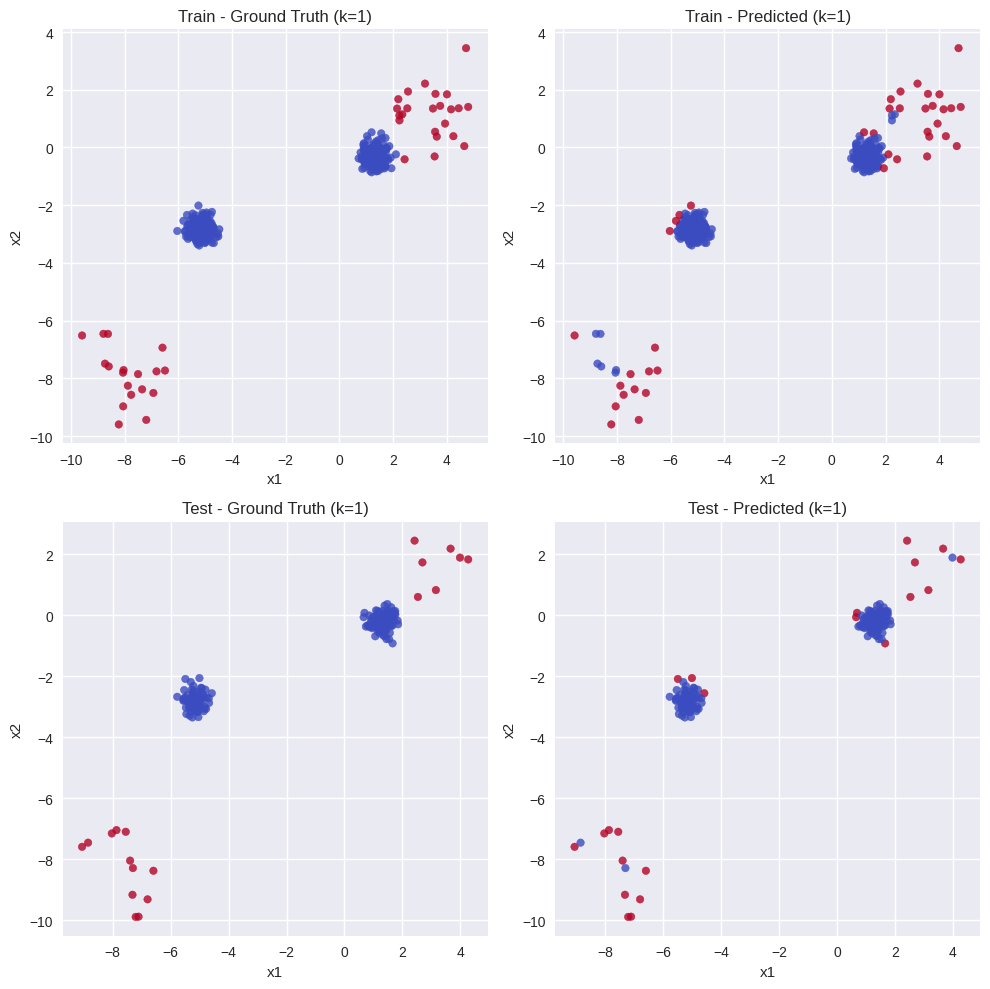

n_neighbors=3, Balanced Accuracy: 1.000


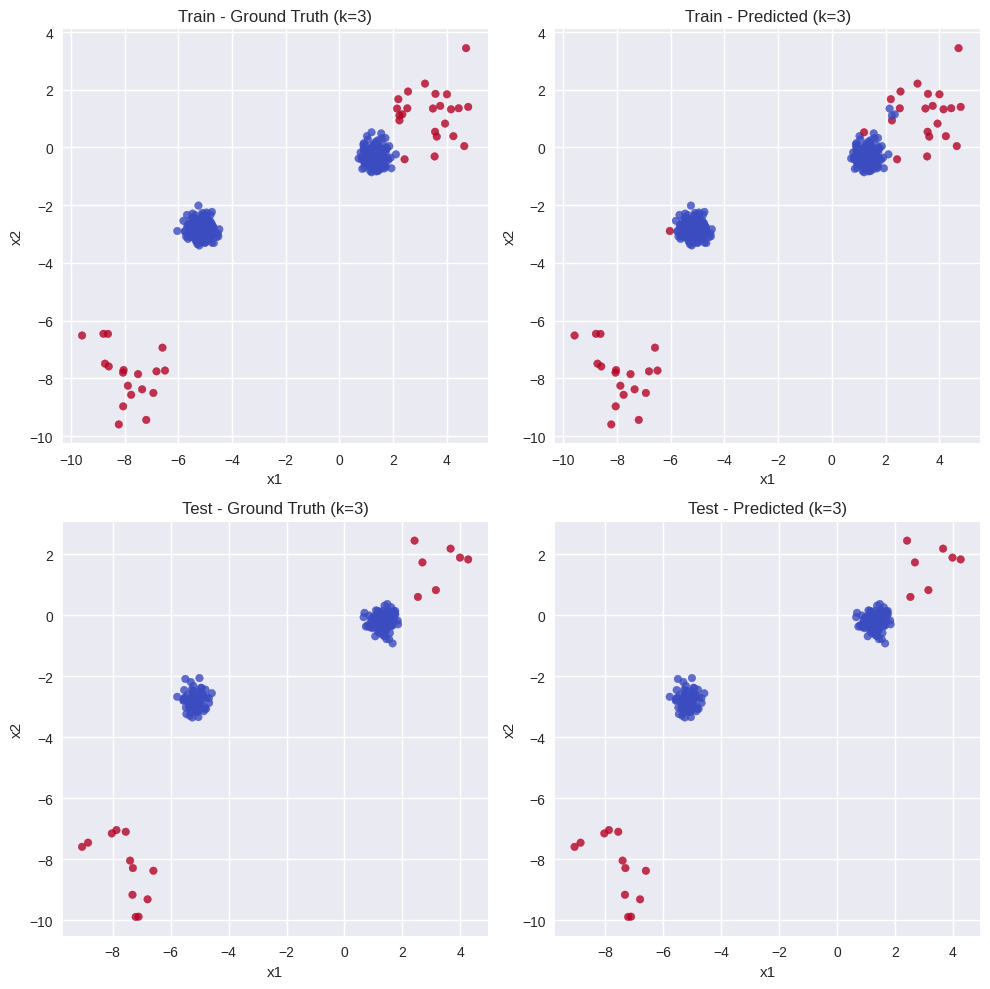

n_neighbors=5, Balanced Accuracy: 1.000


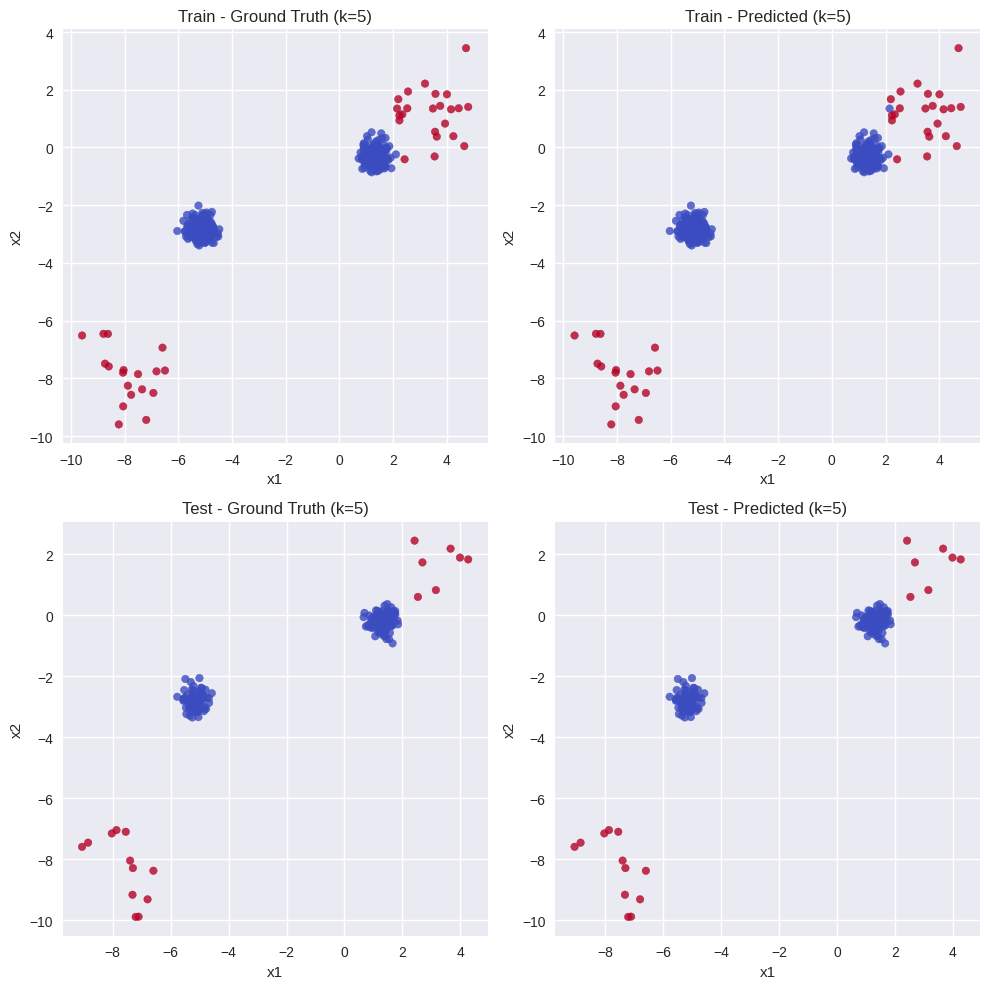

n_neighbors=10, Balanced Accuracy: 1.000


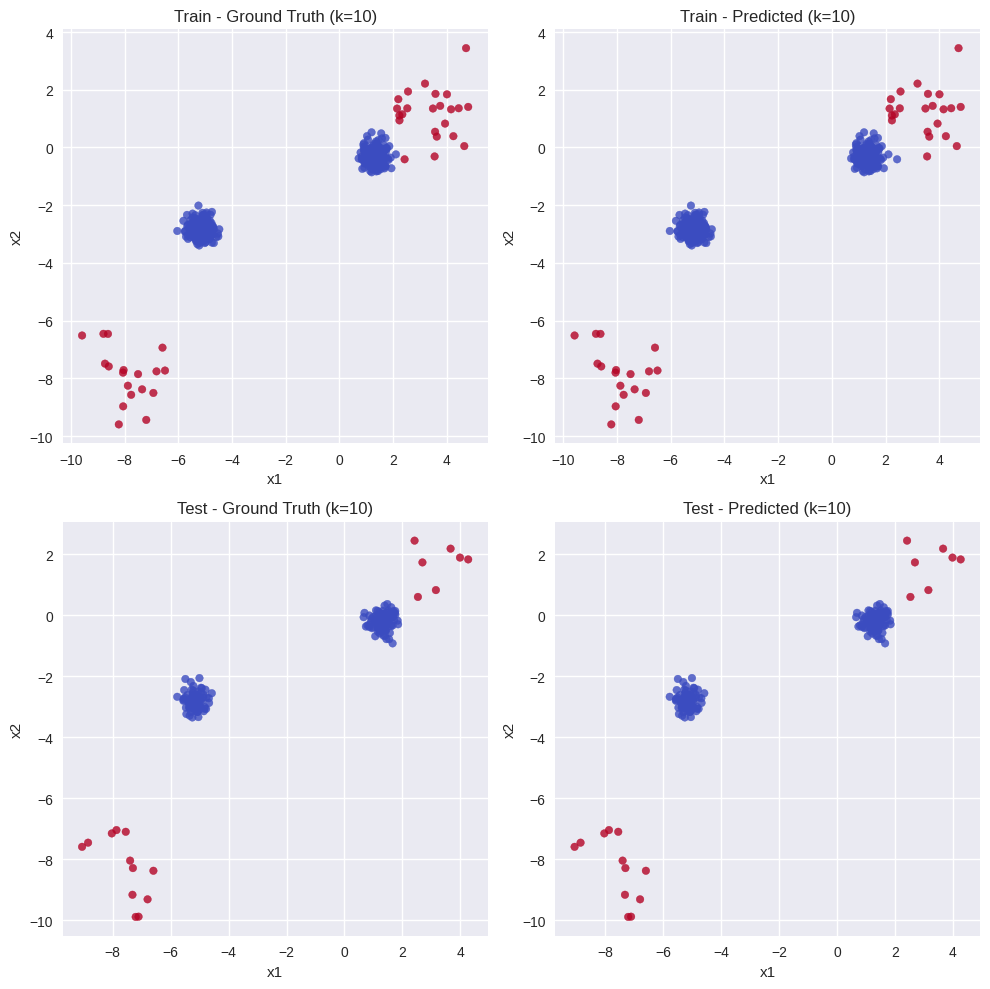

n_neighbors=50, Balanced Accuracy: 1.000


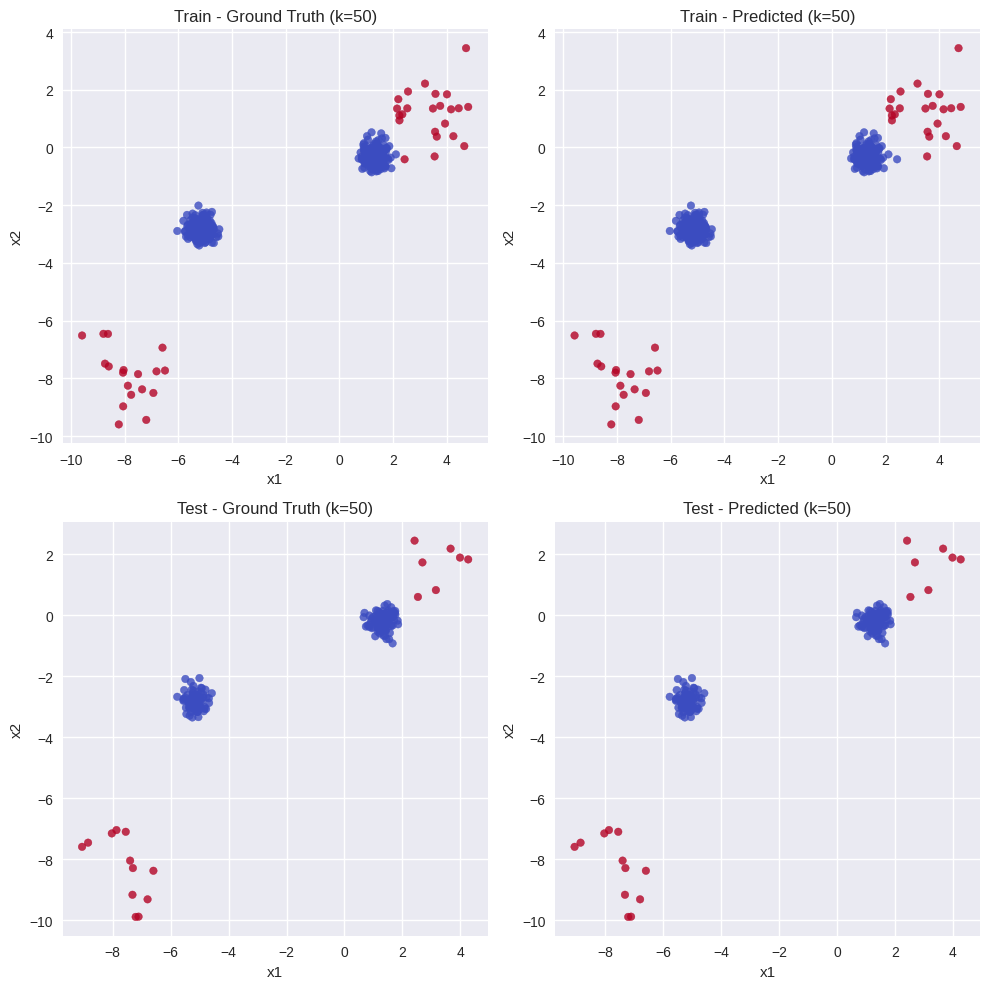

In [158]:
for k in [1, 3, 5, 10, 50]:
    plot_knn_results(X_train, y_train, X_test, y_test, n_neighbors=k)


In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pyod.models.knn import KNN
from pyod.models.lof import LOF


In [155]:
X1, _ = make_blobs(n_samples=200, centers=[(-10, -10)], cluster_std=2, random_state=42)
X2, _ = make_blobs(n_samples=100, centers=[(10, 10)], cluster_std=6, random_state=42)

X = np.vstack((X1, X2))

y_true = np.zeros(X.shape[0])


In [156]:
contamination = 0.07
n_neighbors = 5

clf_knn = KNN(n_neighbors=n_neighbors, contamination=contamination)
clf_knn.fit(X)
y_knn = clf_knn.labels_

clf_lof = LOF(n_neighbors=n_neighbors, contamination=contamination)
clf_lof.fit(X)
y_lof = clf_lof.labels_


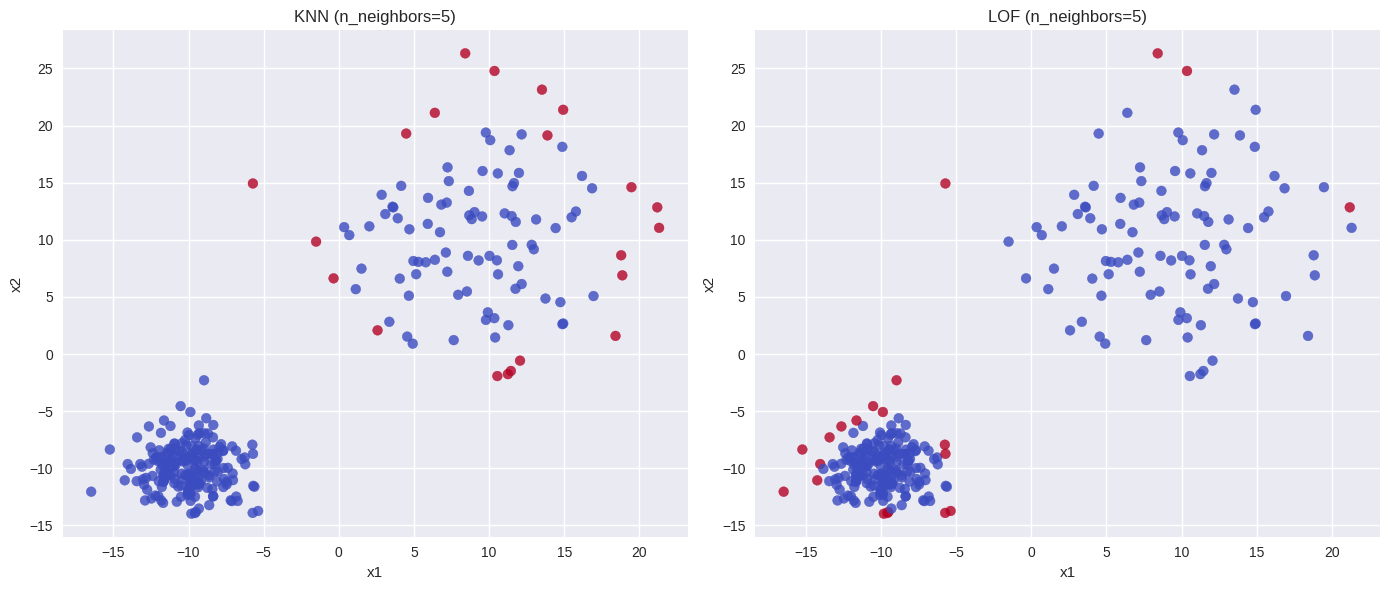

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X[:, 0], X[:, 1], c=y_knn, cmap='coolwarm', s=50, alpha=0.8)
axes[0].set_title(f"KNN (n_neighbors={n_neighbors})")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")

axes[1].scatter(X[:, 0], X[:, 1], c=y_lof, cmap='coolwarm', s=50, alpha=0.8)
axes[1].set_title(f"LOF (n_neighbors={n_neighbors})")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")

plt.tight_layout()
plt.show()


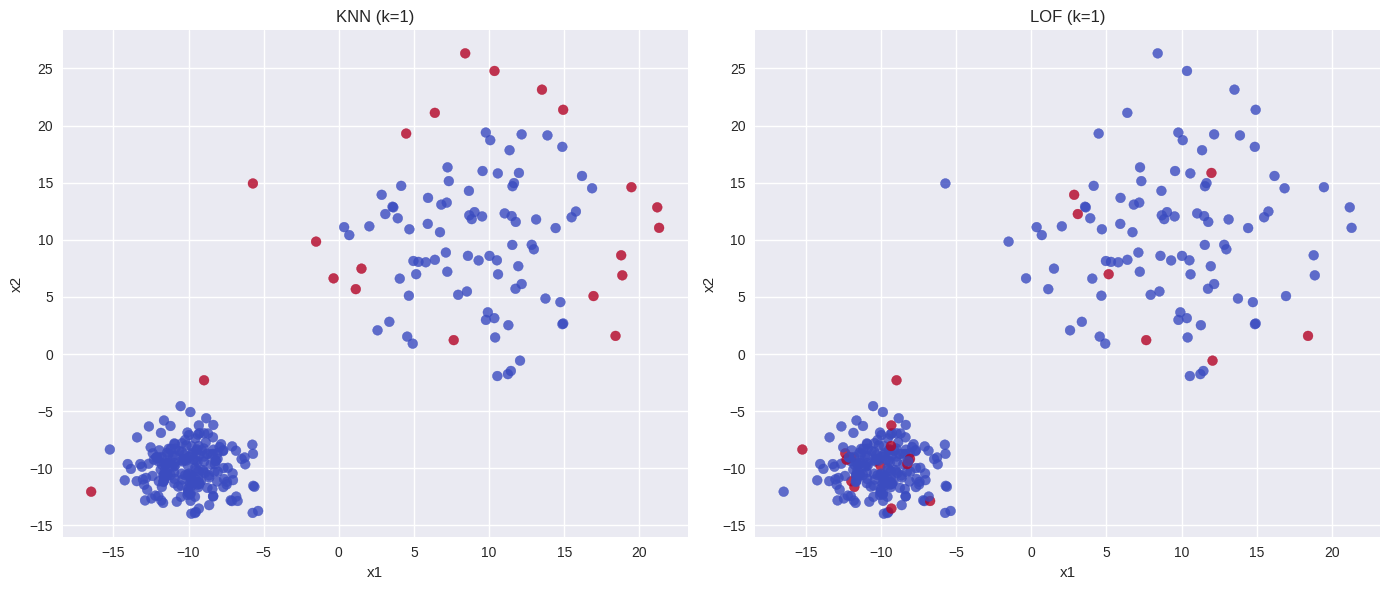

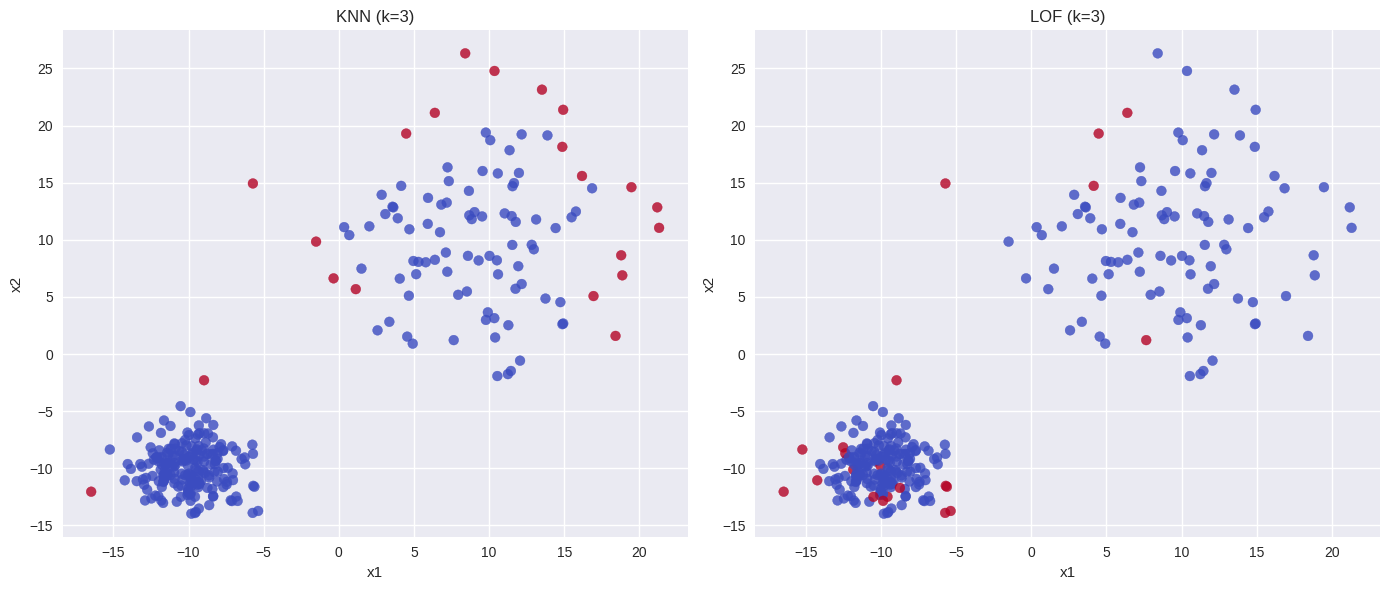

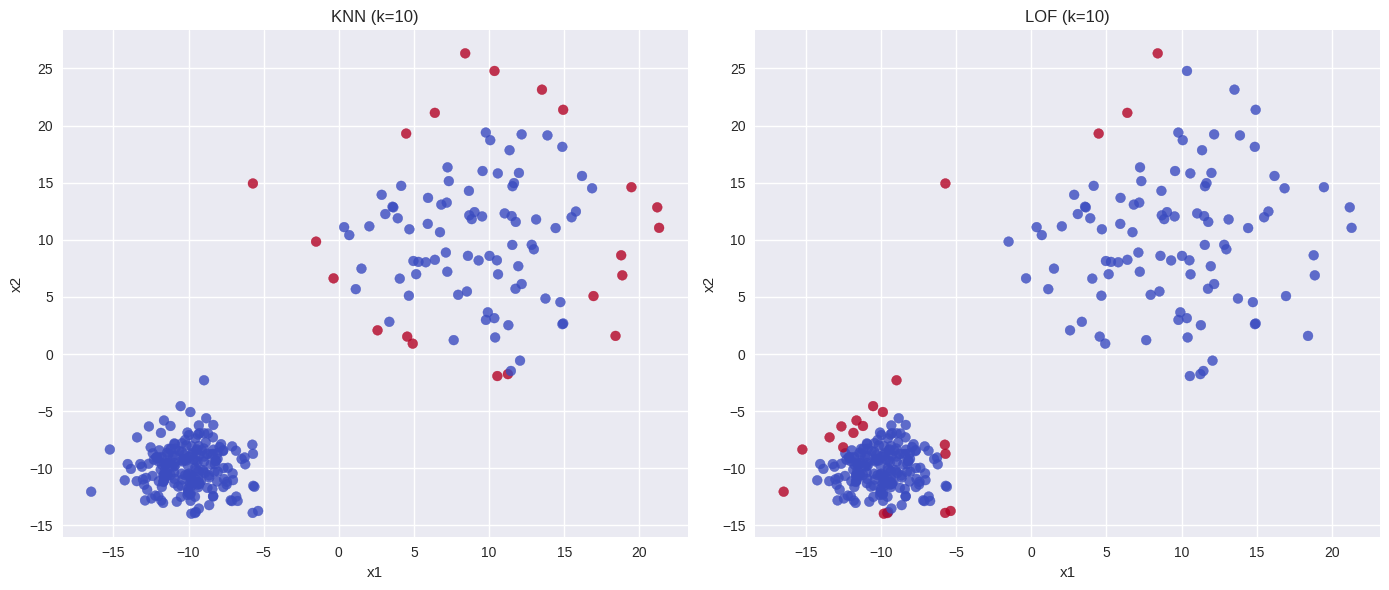

In [106]:
for k in [1, 3, 10]:
    clf_knn = KNN(n_neighbors=k, contamination=contamination)
    clf_knn.fit(X)
    y_knn = clf_knn.labels_

    clf_lof = LOF(n_neighbors=k, contamination=contamination)
    clf_lof.fit(X)
    y_lof = clf_lof.labels_

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    axes[0].scatter(X[:, 0], X[:, 1], c=y_knn, cmap='coolwarm', s=50, alpha=0.8)
    axes[0].set_title(f"KNN (k={k})")
    axes[0].set_xlabel("x1")
    axes[0].set_ylabel("x2")

    axes[1].scatter(X[:, 0], X[:, 1], c=y_lof, cmap='coolwarm', s=50, alpha=0.8)
    axes[1].set_title(f"LOF (k={k})")
    axes[1].set_xlabel("x1")
    axes[1].set_ylabel("x2")

    plt.tight_layout()
    plt.show()


In [131]:
!pip install combo
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.utils.utility import standardizer
from pyod.models.combination import average, maximization
from sklearn.metrics import balanced_accuracy_score


In [132]:
data = scipy.io.loadmat('/content/cardio.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [133]:
X = data['X']
y = data['y'].ravel()

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [135]:
n_models = 10
neighbors_list = np.linspace(30, 120, n_models, dtype=int)
print(neighbors_list)

[ 30  40  50  60  70  80  90 100 110 120]


In [136]:
train_scores = []
test_scores = []

for k in neighbors_list:
    clf = KNN(n_neighbors=k, contamination=contamination)
    clf.fit(X_train)

    train_scores.append(clf.decision_function(X_train))
    test_scores.append(clf.decision_function(X_test))

    y_train_pred = clf.predict(X_train)
    y_test_pred  = clf.predict(X_test)
    ba_train = balanced_accuracy_score(y_train, y_train_pred)
    ba_test  = balanced_accuracy_score(y_test, y_test_pred)
    print(f"k={k}: BA_train={ba_train:.3f}, BA_test={ba_test:.3f}")

train_scores = np.array(train_scores)
test_scores = np.array(test_scores)


k=30: BA_train=0.698, BA_test=0.666
k=40: BA_train=0.715, BA_test=0.676
k=50: BA_train=0.724, BA_test=0.685
k=60: BA_train=0.724, BA_test=0.711
k=70: BA_train=0.743, BA_test=0.719
k=80: BA_train=0.748, BA_test=0.729
k=90: BA_train=0.752, BA_test=0.738
k=100: BA_train=0.756, BA_test=0.738
k=110: BA_train=0.756, BA_test=0.738
k=120: BA_train=0.761, BA_test=0.747


In [137]:
train_scores = np.array(train_scores).T
test_scores  = np.array(test_scores).T
train_scores_norm, test_scores_norm = standardizer(train_scores, test_scores)

In [138]:
avg_train_scores = average(train_scores_norm)
avg_test_scores = average(test_scores_norm)

max_train_scores = maximization(train_scores_norm)
max_test_scores = maximization(test_scores_norm)


In [139]:
thresh_avg = np.quantile(avg_train_scores, 1 - contamination)
thresh_max = np.quantile(max_train_scores, 1 - contamination)


y_avg_train_pred = (avg_train_scores >= thresh_avg).astype(int)
y_avg_test_pred  = (avg_test_scores  >= thresh_avg).astype(int)

y_max_train_pred = (max_train_scores >= thresh_max).astype(int)
y_max_test_pred  = (max_test_scores  >= thresh_max).astype(int)


In [140]:
print("=== Average Ensemble ===")
print(f"BA_train: {balanced_accuracy_score(y_train, y_avg_train_pred):.3f}")
print(f"BA_test:  {balanced_accuracy_score(y_test,  y_avg_test_pred):.3f}")

print("=== Maximization Ensemble ===")
print(f"BA_train: {balanced_accuracy_score(y_train, y_max_train_pred):.3f}")
print(f"BA_test:  {balanced_accuracy_score(y_test,  y_max_test_pred):.3f}")


=== Average Ensemble ===
BA_train: 0.733
BA_test:  0.719
=== Maximization Ensemble ===
BA_train: 0.752
BA_test:  0.728
